In [600]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [601]:
df=pd.read_csv('countries of the world.csv')

In [602]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [603]:
print(df.shape)
print(df.columns)

(227, 20)
Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


In [604]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [605]:
df.duplicated().sum()

np.int64(0)

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [607]:
cols_to_replace=['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Birthrate','Deathrate','Agriculture','Industry','Service','Climate']

In [608]:
for cols in cols_to_replace:
    df[cols]=df[cols].str.replace(',','.')
    df[cols]=pd.to_numeric(df[cols])
    df[cols]=df[cols].fillna(df[cols].median())

In [609]:
df['GDP ($ per capita)']=df['GDP ($ per capita)'].fillna(df['GDP ($ per capita)'].median())

In [610]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [612]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.037621,35.315242,9671.585903,83.604405,235.006608,13.767357,4.533084,81.674097,2.125551,22.070793,9.216652,0.147419,0.281956,0.565661
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856712,35.193412,10030.645350,19.100523,226.103017,12.986425,8.330968,16.073758,0.665761,11.108805,4.949120,0.142429,0.133316,0.160249
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.435000,95.230000,2.250000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [613]:
numeric_cols=['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Birthrate','Deathrate','Agriculture','Industry','Service','Climate','Population','Area (sq. mi.)']

In [614]:
df[numeric_cols].skew()

Pop. Density (per sq. mi.)            8.284886
Coastline (coast/area ratio)          8.221680
Net migration                         0.128555
Infant mortality (per 1000 births)    1.450106
Literacy (%)                         -1.343973
Phones (per 1000)                     1.036936
Arable (%)                            1.346144
Crops (%)                             3.242298
Other (%)                            -0.966313
Birthrate                             0.722981
Deathrate                             1.678308
Agriculture                           1.518833
Industry                              1.156335
Service                              -0.148749
Climate                               0.426545
Population                            9.200223
Area (sq. mi.)                        5.964245
dtype: float64

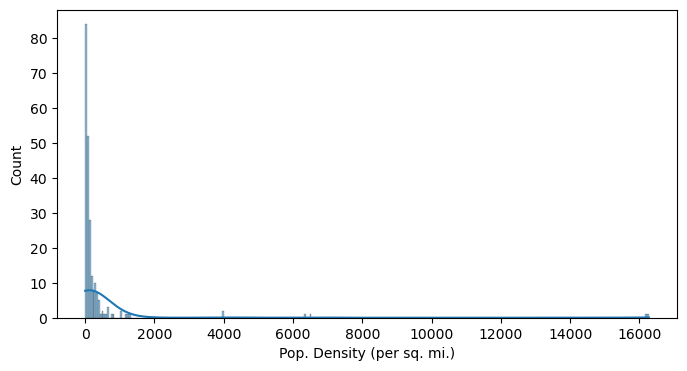

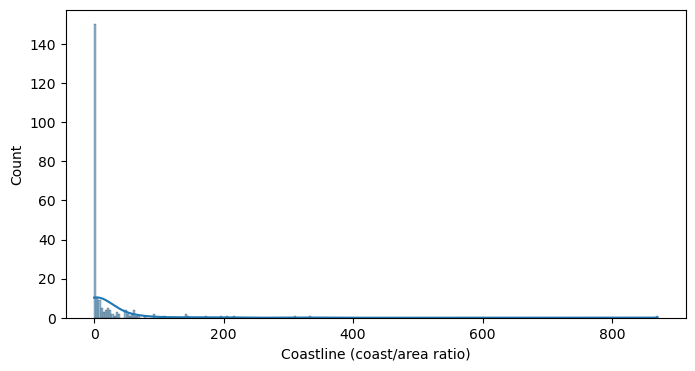

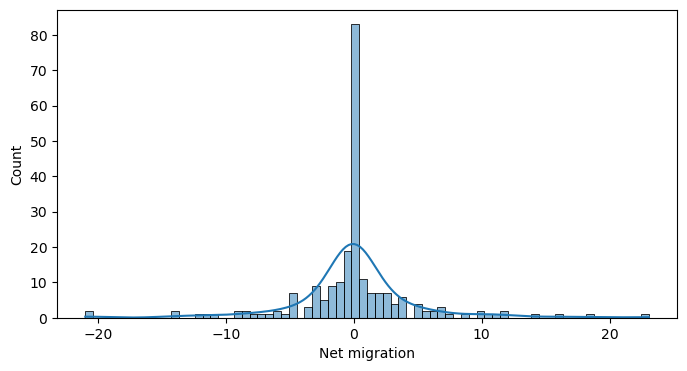

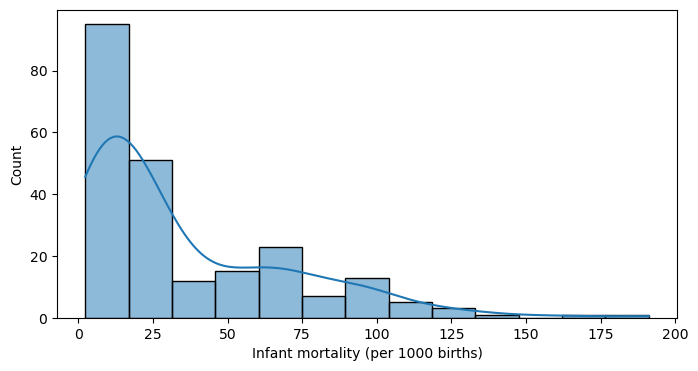

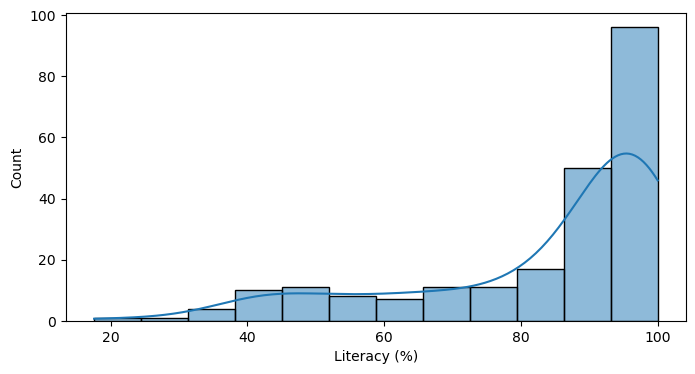

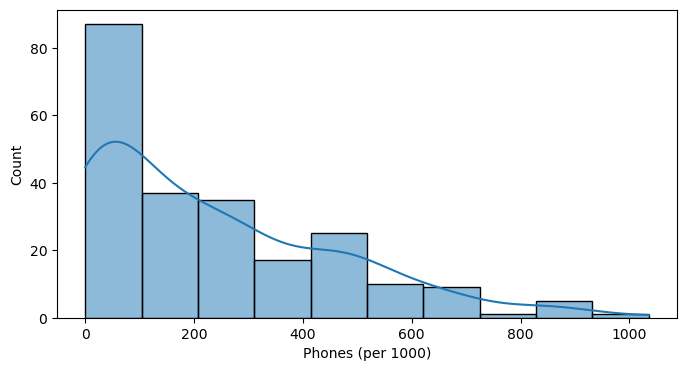

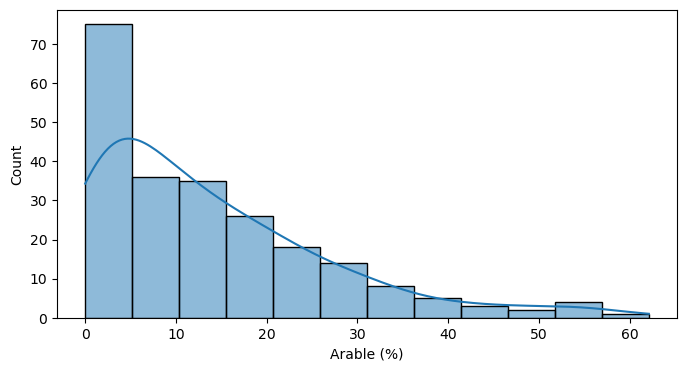

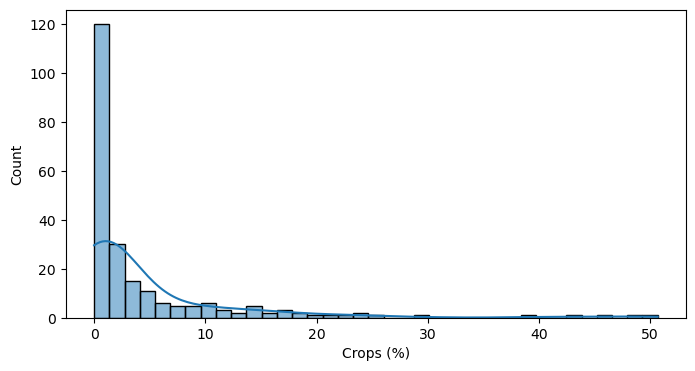

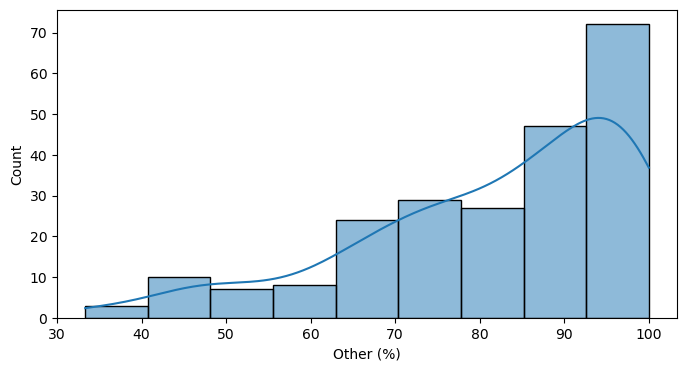

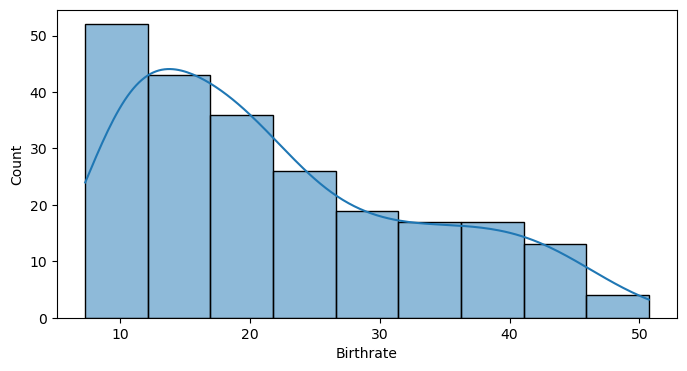

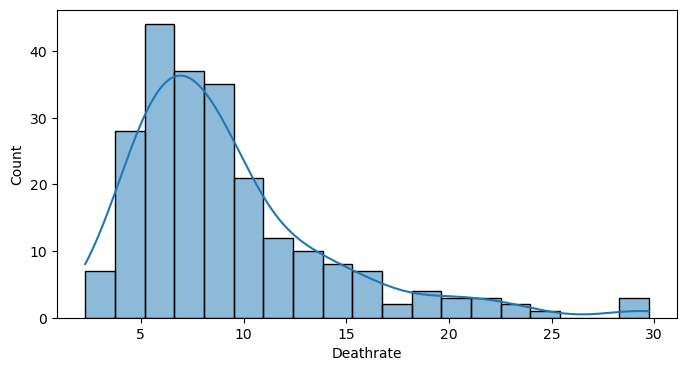

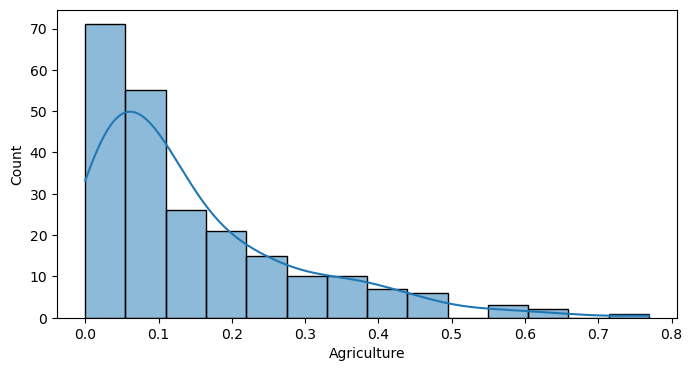

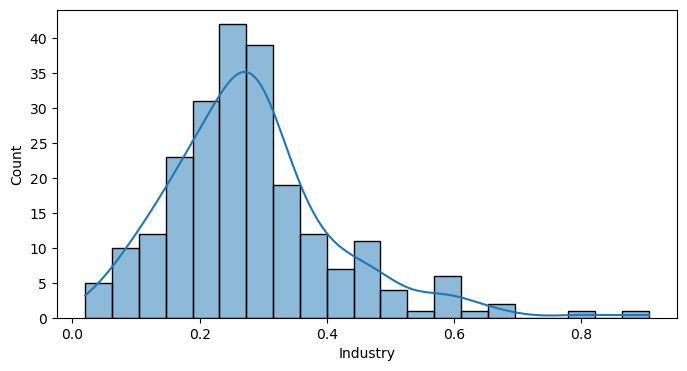

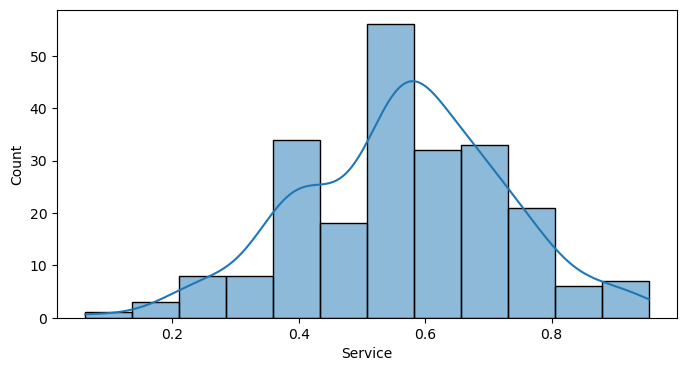

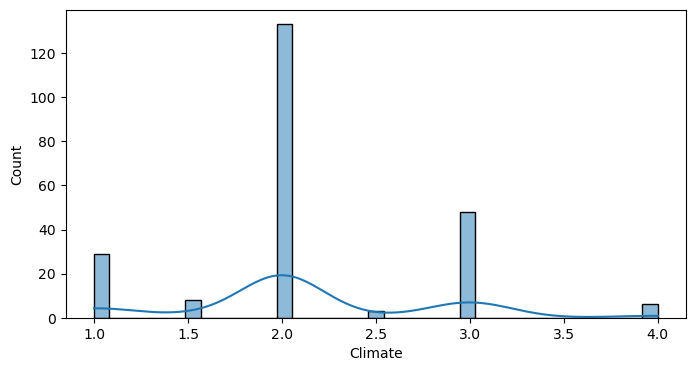

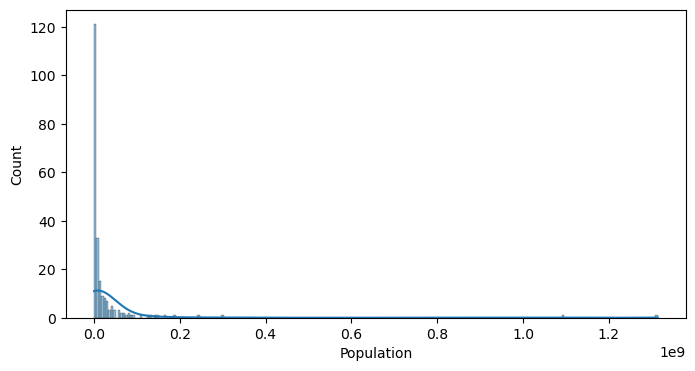

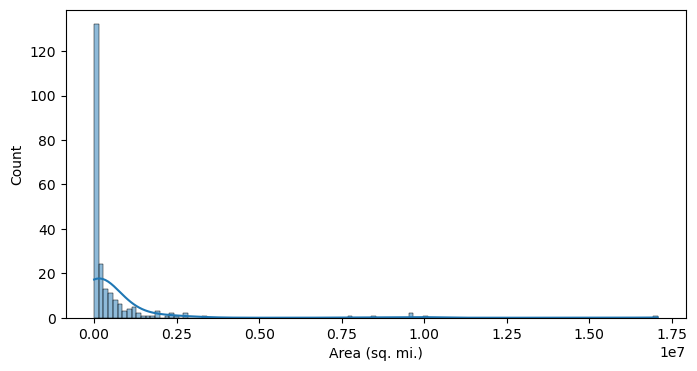

In [615]:
for cols in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[cols],kde=True)

In [616]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df[numeric_cols]=pt.fit_transform(df[numeric_cols])

In [617]:
df[numeric_cols].isna().sum()

Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
Climate                               0
Population                            0
Area (sq. mi.)                        0
dtype: int64

In [618]:
df[numeric_cols].skew()

Pop. Density (per sq. mi.)           -0.017780
Coastline (coast/area ratio)          0.448176
Net migration                        -0.064335
Infant mortality (per 1000 births)    0.016832
Literacy (%)                         -0.635963
Phones (per 1000)                    -0.185109
Arable (%)                           -0.065124
Crops (%)                             0.241514
Other (%)                            -0.291802
Birthrate                             0.023718
Deathrate                             0.002102
Agriculture                           0.248383
Industry                             -0.020225
Service                              -0.003938
Climate                               0.003652
Population                           -0.030777
Area (sq. mi.)                       -0.080025
dtype: float64

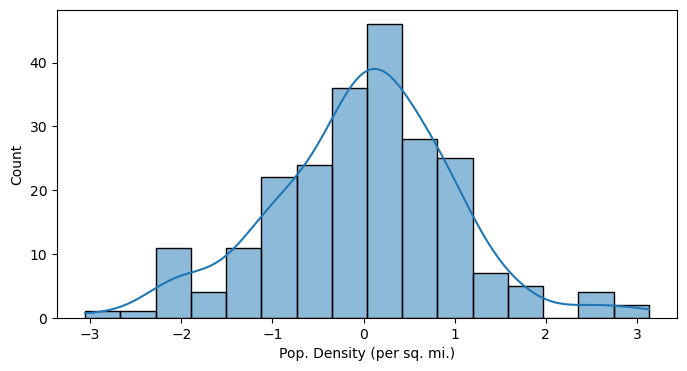

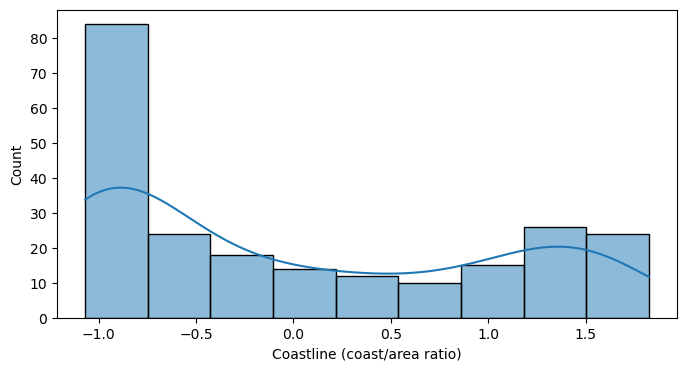

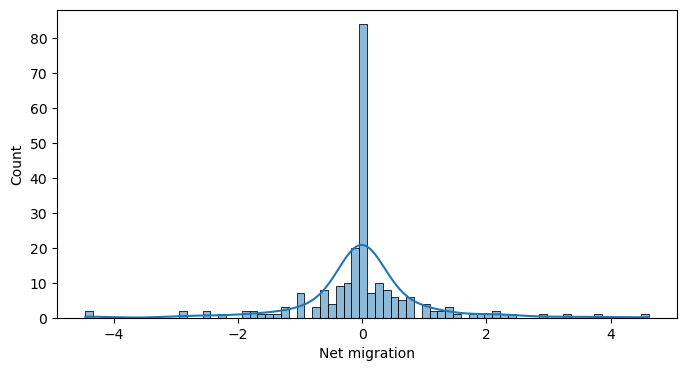

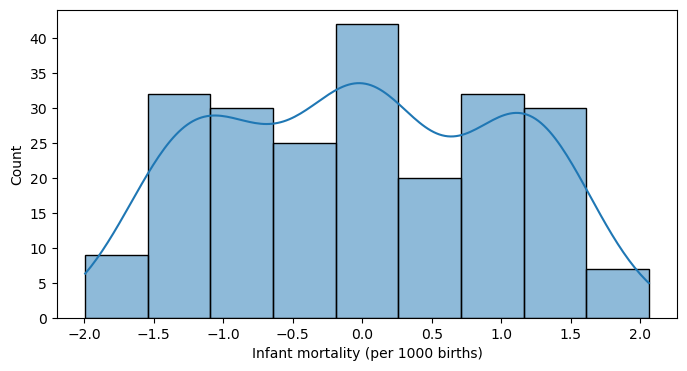

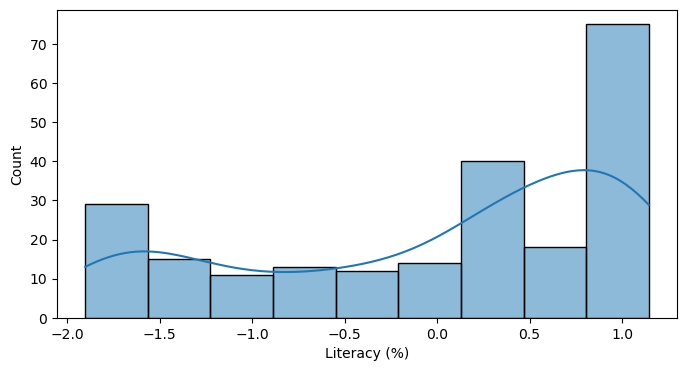

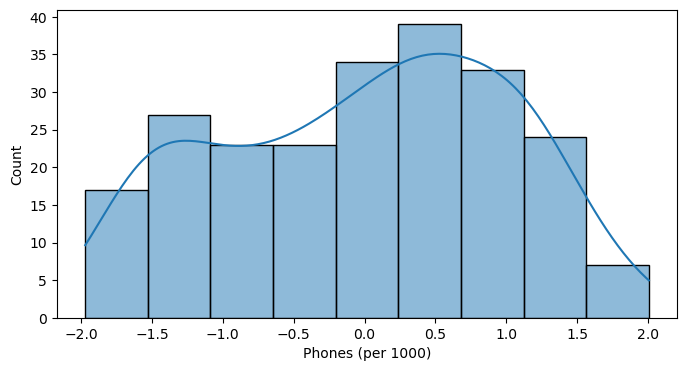

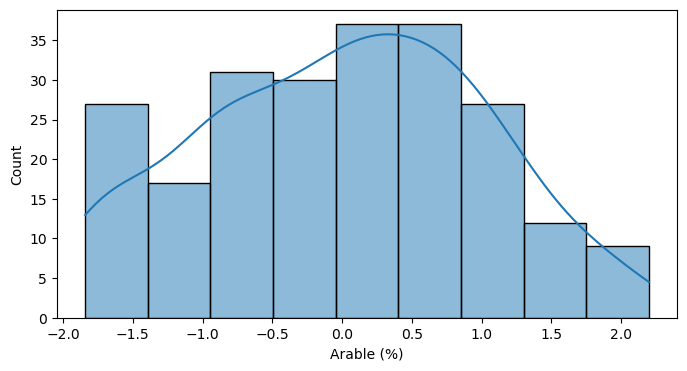

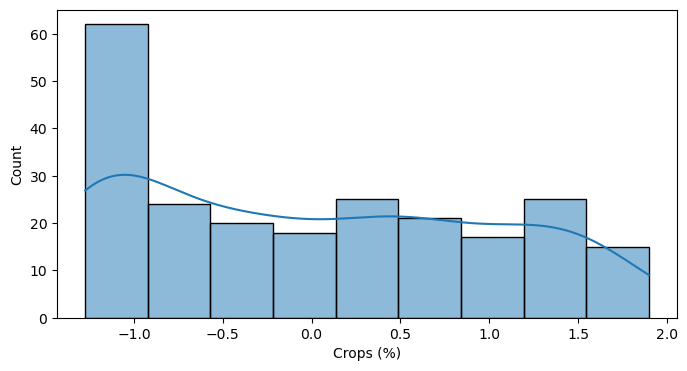

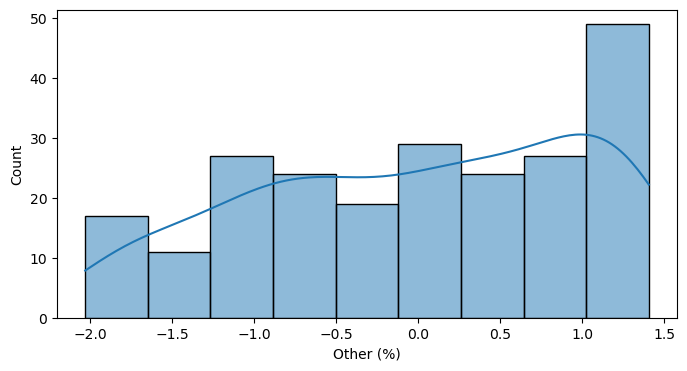

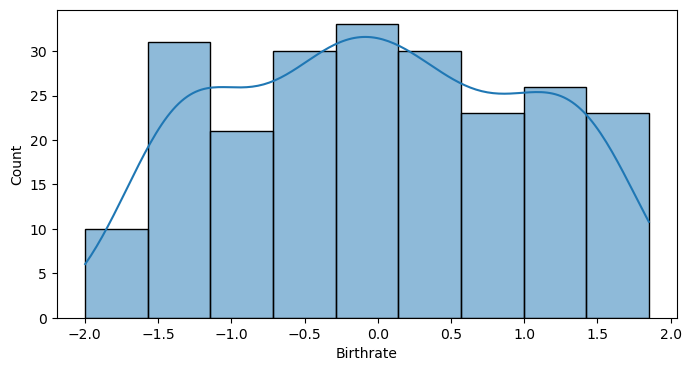

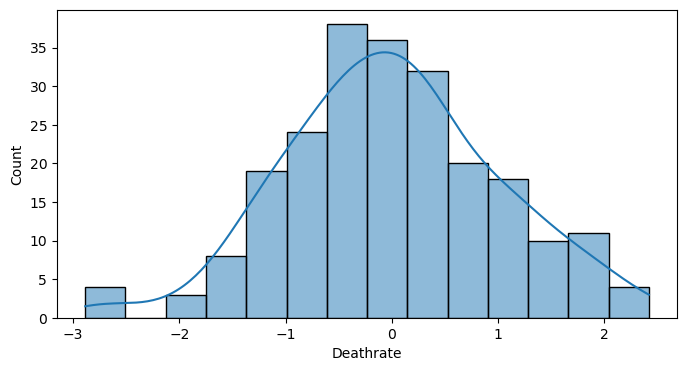

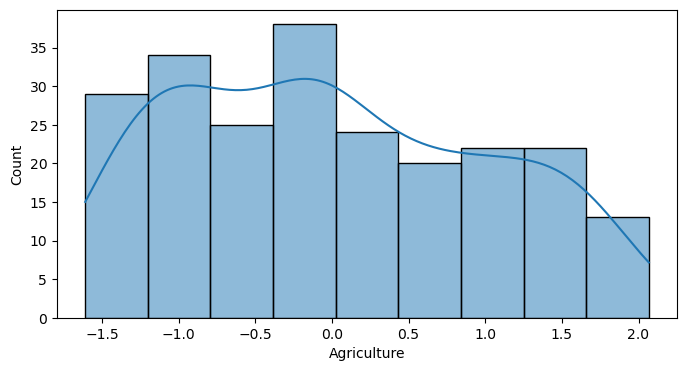

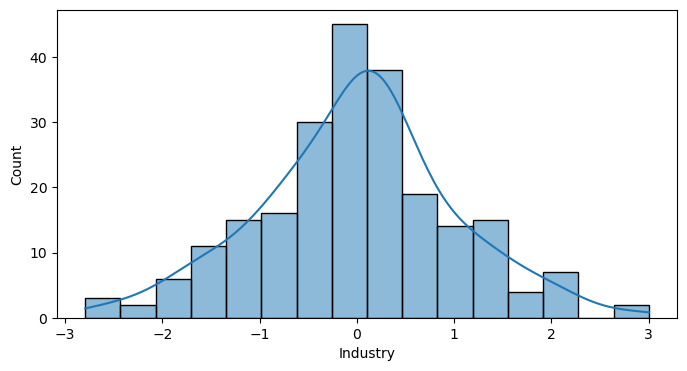

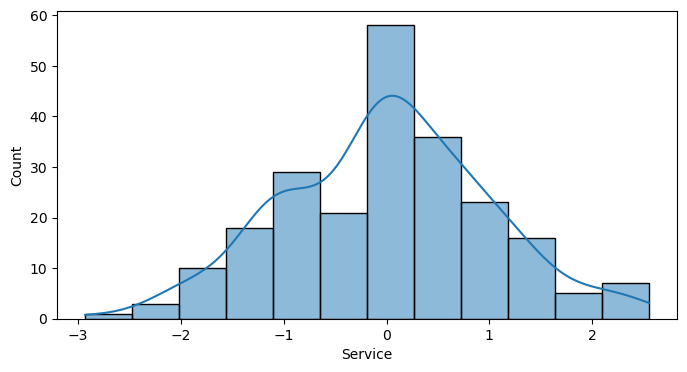

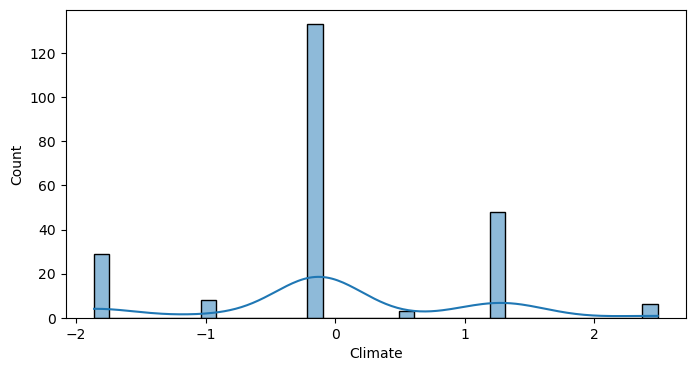

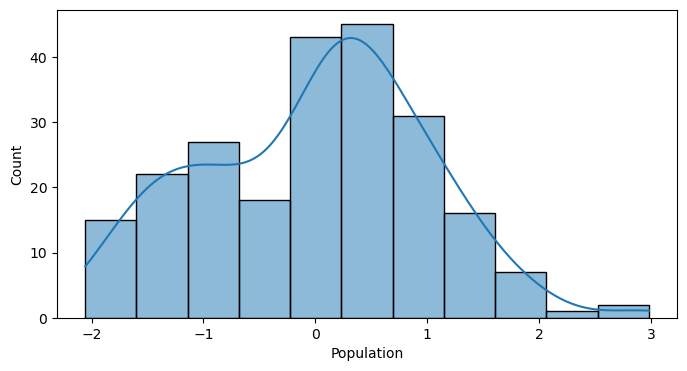

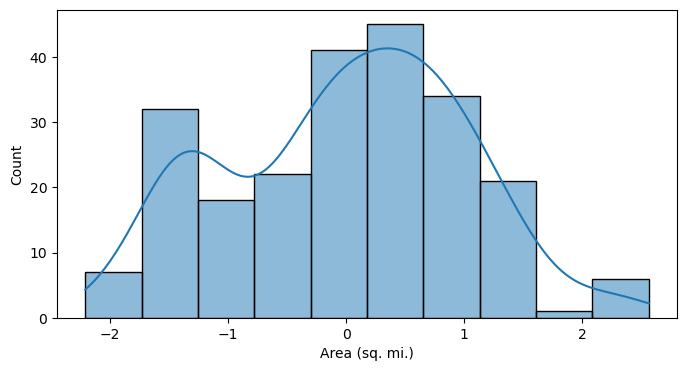

In [619]:
for cols in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[cols],kde=True)

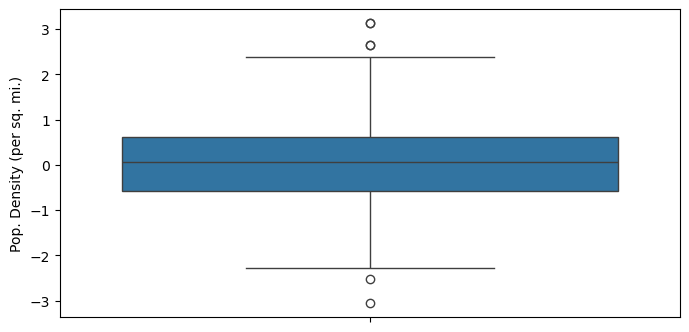

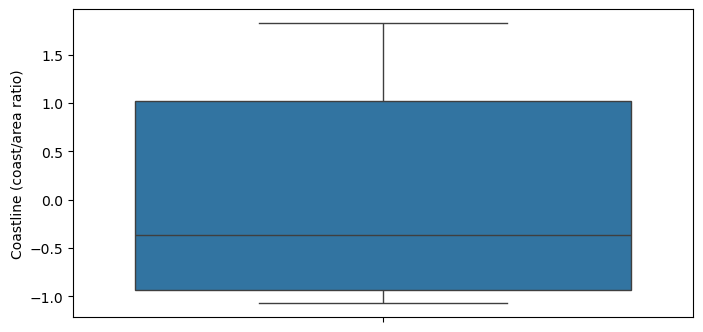

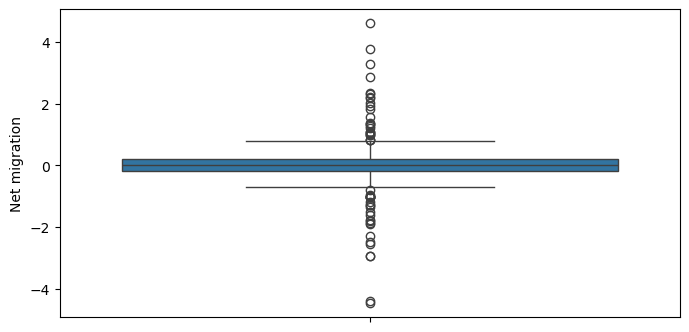

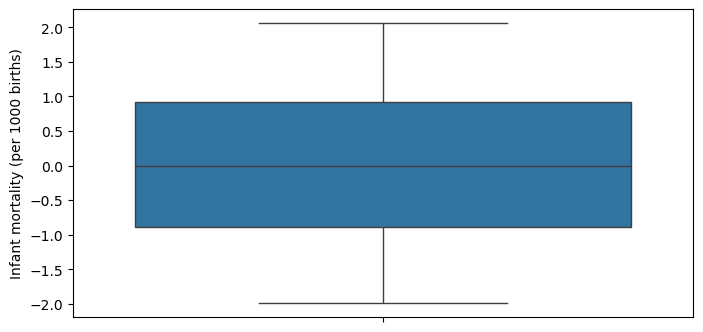

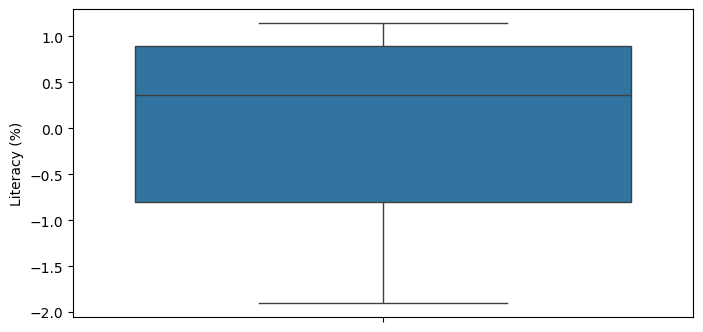

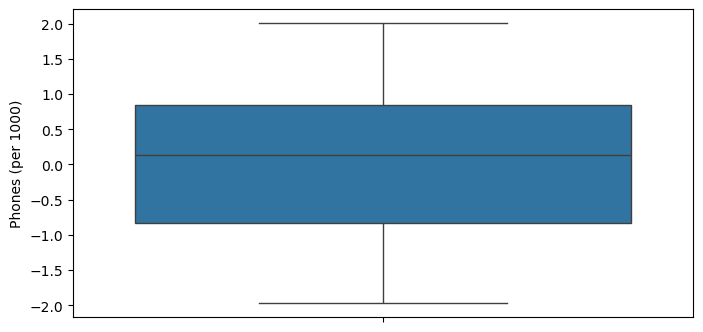

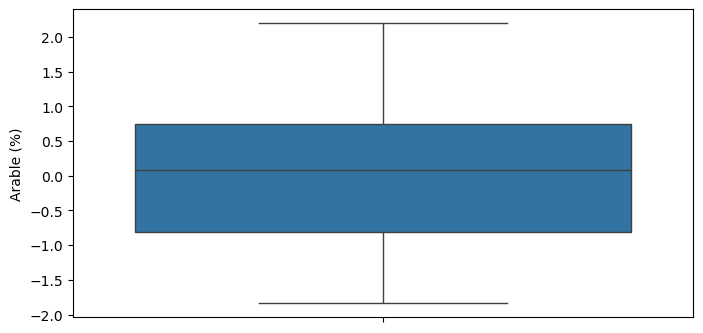

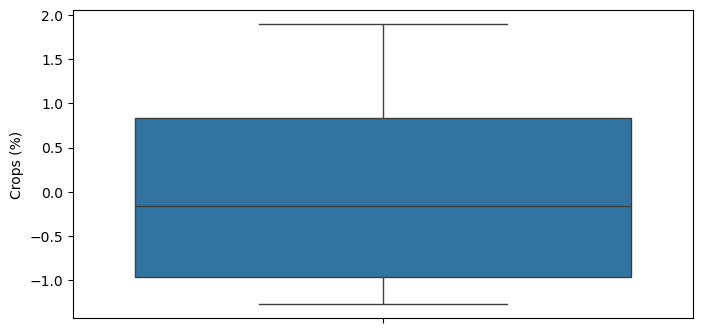

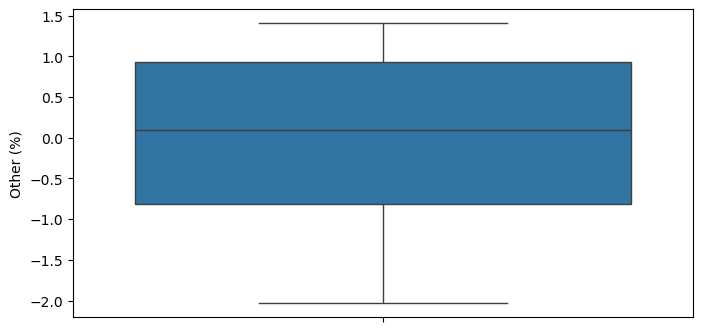

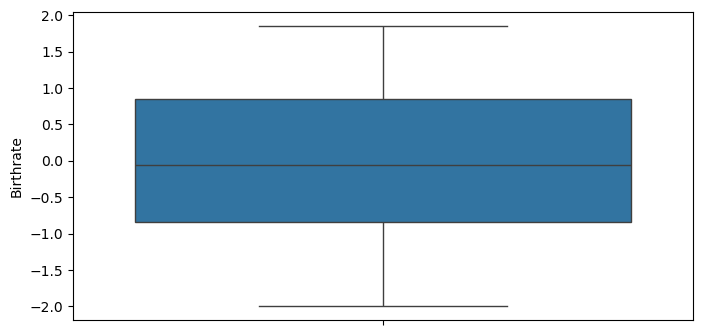

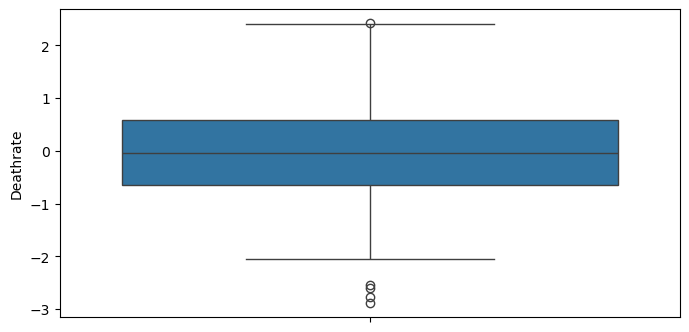

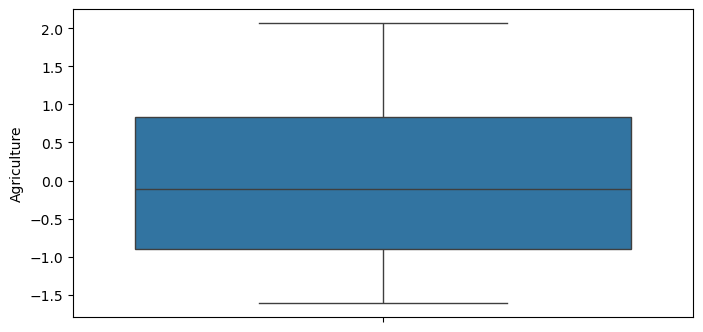

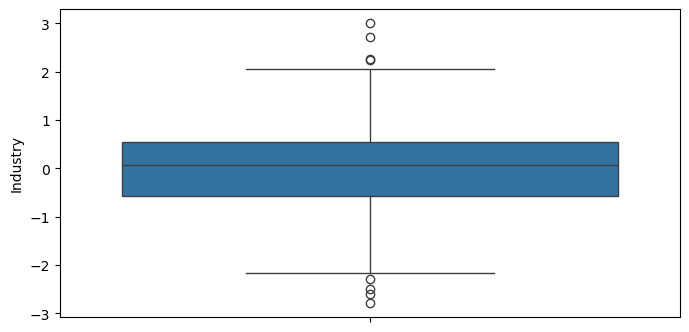

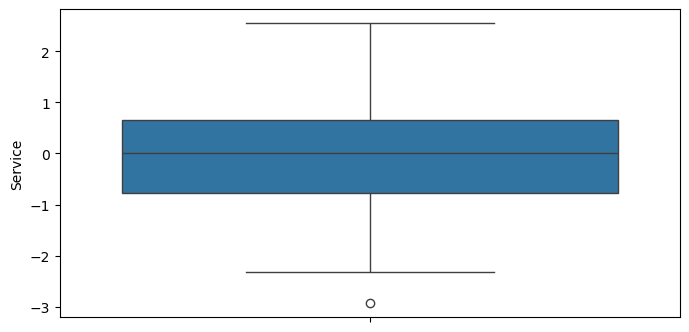

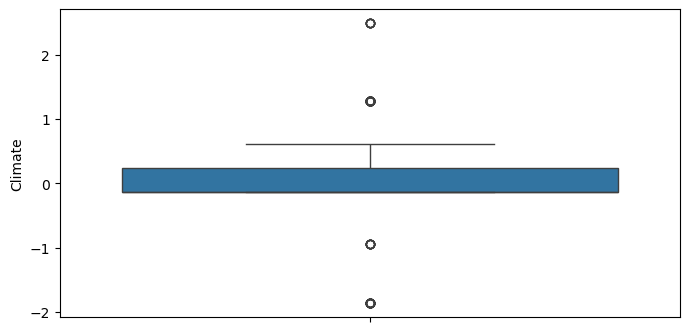

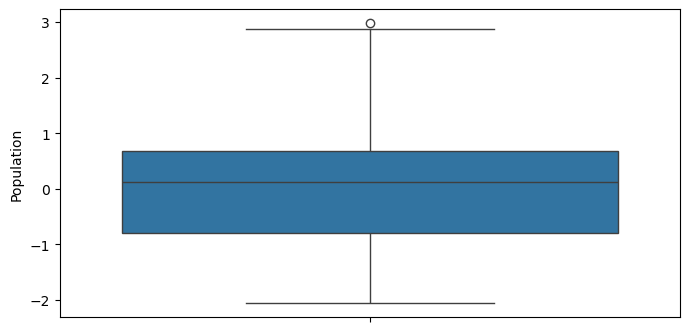

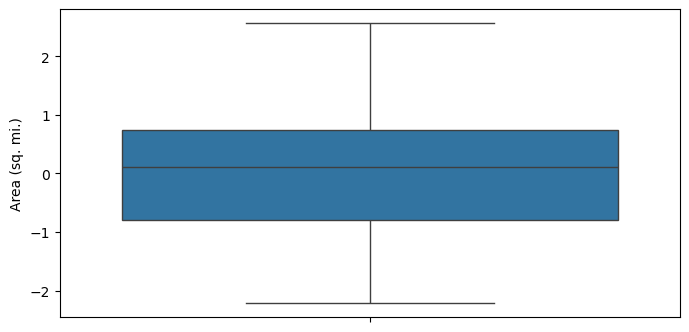

In [620]:
for cols in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[cols])

In [621]:
cols2=['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Birthrate','Deathrate','Agriculture','Industry','Service','Climate','Population','Area (sq. mi.)','GDP ($ per capita)']
corr=df[cols2].corr()

[]

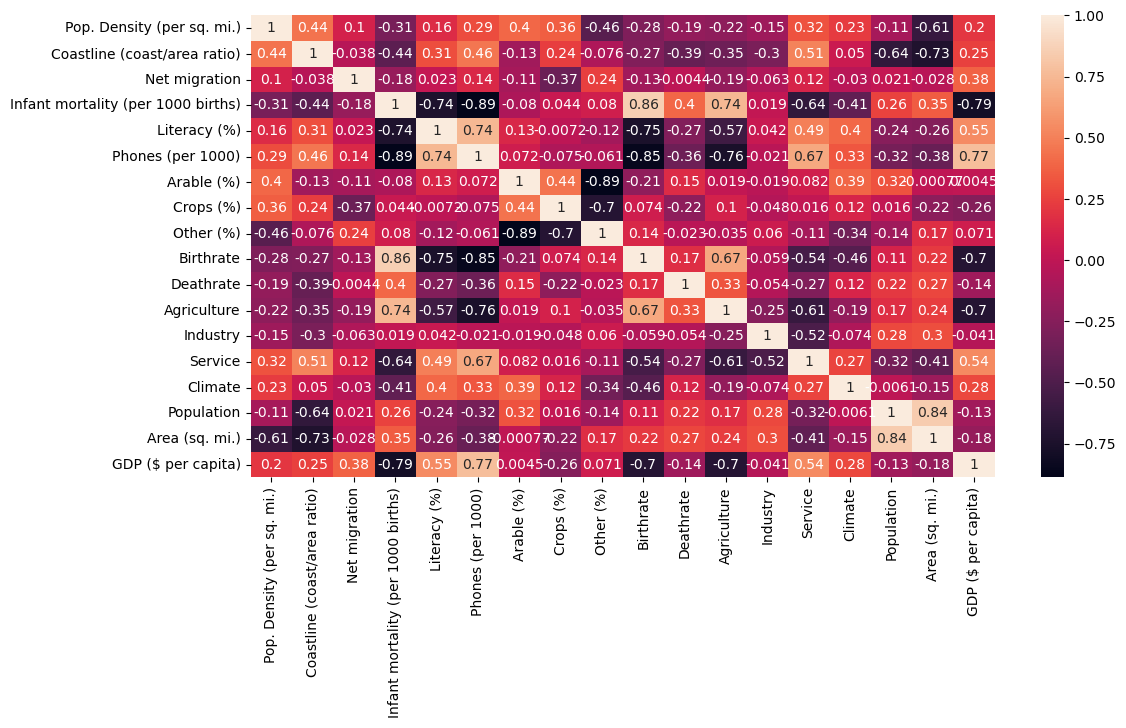

In [622]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.plot()

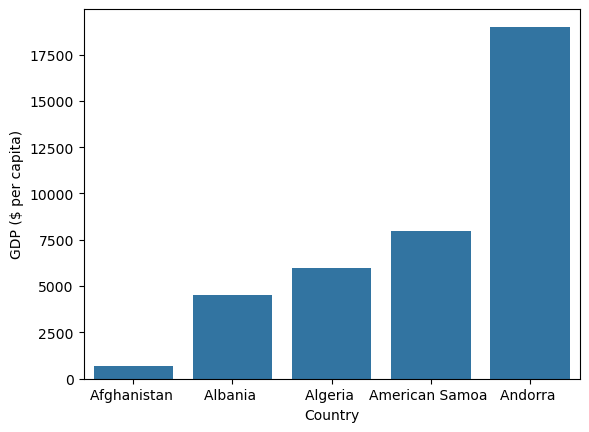

In [623]:
sns.barplot(x='Country',y='GDP ($ per capita)',data=df.head(5))
plt.show()

In [624]:
from sklearn.model_selection import train_test_split

In [625]:
col_to_train=['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Literacy (%)','Phones (per 1000)','Arable (%)','Other (%)','Service','Climate']

In [626]:
X=df[col_to_train]
y=df['GDP ($ per capita)']

In [627]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [628]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [629]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [630]:
models={
    "LinearRegression":LinearRegression(),
    "ridge":RidgeCV(),
    "LassoCV":LassoCV(),
    "LogisticRegression":LogisticRegression(),
    "support vector regression":SVR(kernel='linear'),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 200),
    "XGBRegressor":XGBRegressor()
}

In [631]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    n = x_test_scaled.shape[0]
    p = x_test_scaled.shape[1]

    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")


LinearRegression
R² Score: 0.6586
Adjusted R² Score: 0.5733
MSE: 28386027.3610
RMSE: 5327.8539

ridge
R² Score: 0.6727
Adjusted R² Score: 0.5909
MSE: 27217973.4364
RMSE: 5217.0848

LassoCV
R² Score: 0.6767
Adjusted R² Score: 0.5959
MSE: 26884303.4845
RMSE: 5185.0076

LogisticRegression
R² Score: 0.5092
Adjusted R² Score: 0.3866
MSE: 40808913.0435
RMSE: 6388.1854

support vector regression
R² Score: -0.0683
Adjusted R² Score: -0.3354
MSE: 88838046.7705
RMSE: 9425.3937

KNeighborsRegressor
R² Score: 0.7308
Adjusted R² Score: 0.6635
MSE: 22383141.3043
RMSE: 4731.0825

DecisionTreeRegressor
R² Score: 0.6283
Adjusted R² Score: 0.5354
MSE: 30905869.5652
RMSE: 5559.3048

RandomForestRegressor
R² Score: 0.8236
Adjusted R² Score: 0.7795
MSE: 14671102.6359
RMSE: 3830.2875

GradientBoostingRegressor
R² Score: 0.7457
Adjusted R² Score: 0.6821
MSE: 21150463.0654
RMSE: 4598.9633

XGBRegressor
R² Score: 0.5470
Adjusted R² Score: 0.4338
MSE: 37665350.0928
RMSE: 6137.2103


In [649]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
param_grids = {
    "RandomForestRegressor": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
    },
    "GradientBoostingRegressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
    },
    "KNeighborsRegressor": {
        "n_neighbors": [1,2,3,4,5,6,7,8],
        "weights": ["uniform", "distance"]
    },
    "DecisionTreeRegressor":{
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],   
    },
    "support vector regression": {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

}

for name, model in models.items():
    print(f"\n{name} Results:")
    
    if name in param_grids and param_grids[name]:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(x_train_scaled, y_train)
        best_model = grid.best_estimator_
        print(f"Best Parameters: {grid.best_params_}")
    else:
        best_model = model
        best_model.fit(x_train_scaled, y_train)
    
    y_pred = best_model.predict(x_test_scaled)
    
    n = x_test_scaled.shape[0]
    p = x_test_scaled.shape[1]
    
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")



LinearRegression Results:
R² Score: 0.6586
Adjusted R² Score: 0.5733
MSE: 28386027.3610
RMSE: 5327.8539

ridge Results:
R² Score: 0.6727
Adjusted R² Score: 0.5909
MSE: 27217973.4364
RMSE: 5217.0848

LassoCV Results:
R² Score: 0.6767
Adjusted R² Score: 0.5959
MSE: 26884303.4845
RMSE: 5185.0076

LogisticRegression Results:
R² Score: 0.5092
Adjusted R² Score: 0.3866
MSE: 40808913.0435
RMSE: 6388.1854

support vector regression Results:
Best Parameters: {'C': 100, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}
R² Score: 0.6178
Adjusted R² Score: 0.5222
MSE: 31782607.1950
RMSE: 5637.6065

KNeighborsRegressor Results:
Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}
R² Score: 0.6993
Adjusted R² Score: 0.6241
MSE: 25004336.2532
RMSE: 5000.4336

DecisionTreeRegressor Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
R² Score: 0.6209
Adjusted R² Score: 0.5261
MSE: 31523478.2609
RMSE: 5614.5773

RandomForestRegressor Results:
Best Parameters: {'max_depth': 20,

In [639]:
best_overall_model = None
best_r2 = -np.inf

if r2 > best_r2:
    best_r2 = r2
    best_overall_model = best_model


In [640]:
import mlflow
import mlflow.sklearn

# Optionally, set experiment name
mlflow.set_experiment("GDP_Prediction_Experiment")

<Experiment: artifact_location='file:///d:/endtoend%28mlflow%29/mlruns/338012762594060984', creation_time=1761411699745, experiment_id='338012762594060984', last_update_time=1761411699745, lifecycle_stage='active', name='GDP_Prediction_Experiment', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [650]:
for name, model in models.items():
    with mlflow.start_run(run_name=name) as run:
        print(f"\n{name} Results:")
        if name in param_grids and param_grids[name]:
            grid = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
            grid.fit(x_train_scaled, y_train)
            best_model = grid.best_estimator_
            print(f"Best Parameters: {grid.best_params_}")
            mlflow.log_param("best_params", grid.best_params_)
        else:
            best_model = model
            best_model.fit(x_train_scaled, y_train)
        y_pred = best_model.predict(x_test_scaled)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        mlflow.log_param("model_type", type(best_model).__name__)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.sklearn.log_model(best_model, name="model", input_example=x_train_scaled[:5])

        print(f"Run completed. Run ID: {run.info.run_id}")



LinearRegression Results:


Run completed. Run ID: 6578e3ef89c14aa89d92919c73b96b80

ridge Results:


Run completed. Run ID: 33f972ec81d74fdc925c08edb1a9bf2a

LassoCV Results:


Run completed. Run ID: 644b68613ce245158bde217a0de4939f

LogisticRegression Results:


Run completed. Run ID: 4fd1dd7e5f574a4198fdf0ac6b4c0426

support vector regression Results:
Best Parameters: {'C': 100, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}


Run completed. Run ID: 40a731a30906420490c61b32dea77760

KNeighborsRegressor Results:
Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}


Run completed. Run ID: 72c8a5d57f5a4eed8f6722bdab6c5c8e

DecisionTreeRegressor Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 5}


Run completed. Run ID: 47843520c2b947589ce1eeb593f4a676

RandomForestRegressor Results:
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


Run completed. Run ID: bf672f048eff4c88a4759680cab781ea

GradientBoostingRegressor Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Run completed. Run ID: fa47abf31bdb48718751b0575523db67

XGBRegressor Results:


Run completed. Run ID: 2be83997c71149588d3653f325b0ab61
